## libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Read_dataset

In [2]:
data_df= pd.read_csv('student_depression_dataset.csv')
data_df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


## Data exploration & cleaning

In [3]:
data_df.shape

(27901, 18)

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
data_df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

**Data IS FREE OF NON VALUES**

In [6]:
data_df.nunique()

id                                       27901
Gender                                       2
Age                                         34
City                                        52
Profession                                  14
Academic Pressure                            6
Work Pressure                                3
CGPA                                       332
Study Satisfaction                           6
Job Satisfaction                             5
Sleep Duration                               5
Dietary Habits                               4
Degree                                      28
Have you ever had suicidal thoughts ?        2
Work/Study Hours                            13
Financial Stress                             6
Family History of Mental Illness             2
Depression                                   2
dtype: int64

In [7]:
data_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
data_df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

In [9]:
data_df['Sleep Duration'].unique()

array(["'5-6 hours'", "'Less than 5 hours'", "'7-8 hours'",
       "'More than 8 hours'", 'Others'], dtype=object)

In [10]:
data_df['Financial Stress'].unique()

array(['1.0', '2.0', '5.0', '3.0', '4.0', '?'], dtype=object)

**DATA IS FREE OF TYPOS EXCEPT "Financial Stress" HAS "?" NEED TO EXCHANGE**

In [11]:
data_df['Financial Stress'].replace('?','UNKNOW', inplace=True)
data_df['Financial Stress'].unique()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5316\2190795468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Financial Stress'].replace('?','UNKNOW', inplace=True)


array(['1.0', '2.0', '5.0', '3.0', '4.0', 'UNKNOW'], dtype=object)

**Change the name of the column 'Have you ever had suicidal thoughts?' and replace the values of yes and no with 1 and 0**

In [12]:
data_df.rename(columns={'Have you ever had suicidal thoughts ?':'Suicidal thoughts'}, inplace=True)


In [13]:
data_df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0}, inplace=True)
data_df['Suicidal thoughts'].replace({'Yes': 1, 'No': 0}, inplace=True)



C:\Users\DELL\AppData\Local\Temp\ipykernel_5316\2152386288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['Family History of Mental Illness'].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5316\2152386288.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', 

In [14]:
data_df.drop_duplicates()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Suicidal thoughts,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',1,7.0,1.0,1,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,0,0.0,3.0,1,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,0,12.0,2.0,0,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',1,10.0,5.0,0,1


**Dataset after removing duplicates still (27901:18)**

In [15]:
data_df[['Age', 'Academic Pressure' , 'Work Pressure' ,	'CGPA' , 'Study Satisfaction','Work/Study Hours','Job Satisfaction']].describe().round(1)

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Work/Study Hours,Job Satisfaction
count,27901.0,27901.0,27901.0,27901.0,27901.0,27901.0,27901.0
mean,25.8,3.1,0.0,7.7,2.9,7.2,0.0
std,4.9,1.4,0.0,1.5,1.4,3.7,0.0
min,18.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,21.0,2.0,0.0,6.3,2.0,4.0,0.0
50%,25.0,3.0,0.0,7.8,3.0,8.0,0.0
75%,30.0,4.0,0.0,8.9,4.0,10.0,0.0
max,59.0,5.0,5.0,10.0,5.0,12.0,4.0


**Check if there are outliers.**

In [16]:
Q1 = data_df['Academic Pressure'].quantile(0.25)
Q3 = data_df['Academic Pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_value = Q1 -1.5*IQR 

HIGEST_VALUE= Q3+1.5*IQR 

outliers = data_df[(data_df['Academic Pressure'] < lower_value) | (data_df['Academic Pressure'] > HIGEST_VALUE)]
print(outliers)

Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study Satisfaction, Job Satisfaction, Sleep Duration, Dietary Habits, Degree, Suicidal thoughts, Work/Study Hours, Financial Stress, Family History of Mental Illness, Depression]
Index: []


**THERE ARE  NO OUTLIERS IN Academic Pressure**

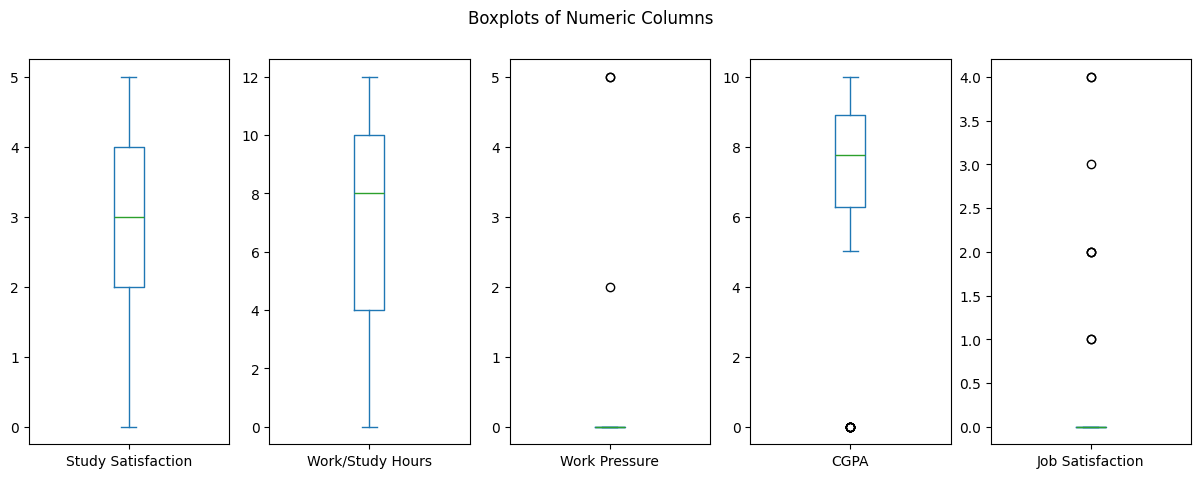

In [17]:
numeric_cols = ['Study Satisfaction','Work/Study Hours','Work Pressure','CGPA','Job Satisfaction']
data_df[numeric_cols].plot(kind='box', subplots=True, layout=(1, 5), figsize=(15, 5), sharey=False)
plt.suptitle('Boxplots of Numeric Columns')
plt.show()

there are outlaiers in work pressure are (2,5)

outlayer in "CGPA" is (0)

In [18]:
outliers_count = len(data_df[data_df['CGPA'] == 0])
total_rows = len(data_df)
percentage = (outliers_count / total_rows) * 100
print(f"Outliers represent {percentage:.2f}% of the dataset.")


Outliers represent 0.03% of the dataset.


In [19]:
outliers_count = len(data_df[data_df['Work Pressure'].isin([2, 5])])
total_rows = len(data_df)
percentage = (outliers_count / total_rows) * 100
print(f"Outliers represent {percentage:.2f}% of the dataset.")


Outliers represent 0.01% of the dataset.


In [20]:
outliers_count = len(data_df[data_df['Job Satisfaction'].isin([1,2,3,4])])
total_rows = len(data_df)
percentage = (outliers_count / total_rows) * 100
print(f"Outliers represent {percentage:.2f}% of the dataset.")


Outliers represent 0.03% of the dataset.


Outlier detection using boxplots showed some outliers in 'cgpa,' 'job satisfaction,' and 'work pressure.

'Based on the boxplots, it is clear that most values in the Work Pressure and Job Satisfaction columns are zero. 

This indicates that the majority of students are not currently employed. 
Only a small number of students have non-zero values, which appear as outliers in the boxplot.

I decided to keep them since they are within a realistic range or do not significantly affect the analysis.

**save data**

In [21]:
data_df.to_csv("cleaned_student_depression_dataset.csv", index=False)

# visualization main points

**1.Understanding Demographics & Profiles**


1.1 What is the age and gender distribution of the participants?

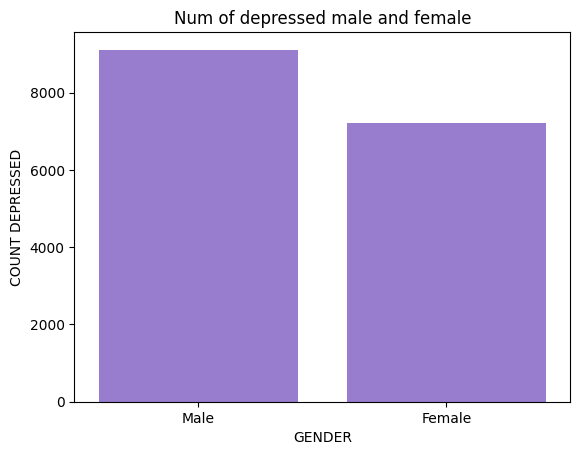

In [22]:
depressed_df = data_df[data_df['Depression'] == 1]
sns.countplot(x='Gender',color='mediumpurple', data=depressed_df)
plt.title("Num of depressed male and female")
plt.ylabel("COUNT DEPRESSED")
plt.xlabel("GENDER")
plt.show()


Men are more exposed to depression than women.

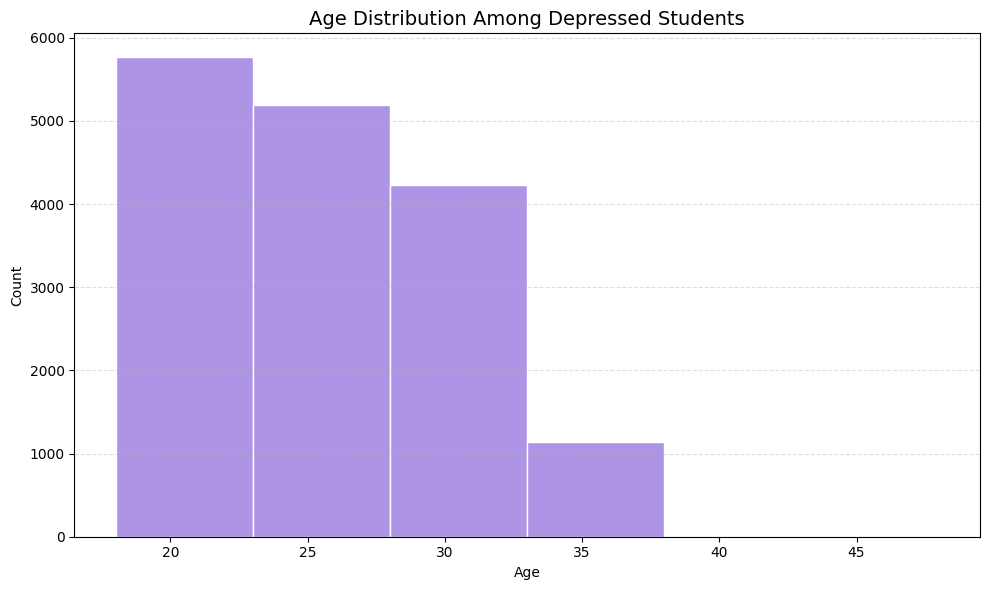

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data=depressed_df, x='Age', bins=6, color='mediumpurple', edgecolor='white', kde=False)
plt.title("Age Distribution Among Depressed Students", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



The highest student exposure to depression is among those who are 20, 24, and 28 years old.

1.2 Which cities or professions are most represented in the data?

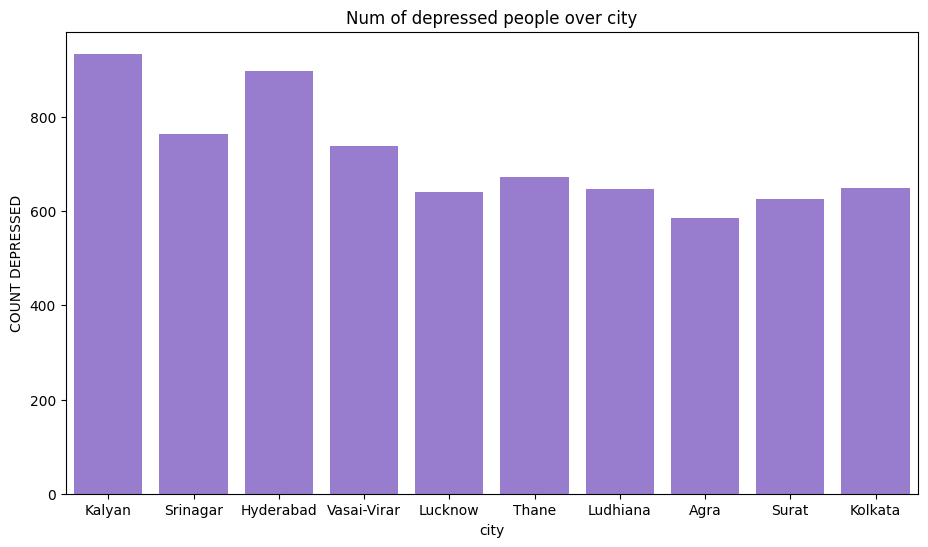

In [24]:
plt.figure(figsize=(11,6))
depressed_df = data_df[data_df['Depression'] == 1]
sns.countplot(x='City',color='mediumpurple', data=depressed_df, order=data_df['City'].value_counts().index[:10])
plt.title("Num of depressed people over city")
plt.ylabel("COUNT DEPRESSED")
plt.xlabel("city")
plt.show()


'Kalyan' and 'Hyderabad' are the highest cities where people suffer from depression.
Agra is the lowest city.

**2.Academic & Work Pressures**

2.1 Does Academic Pressure and Suicidal thoughts affect mental health ?

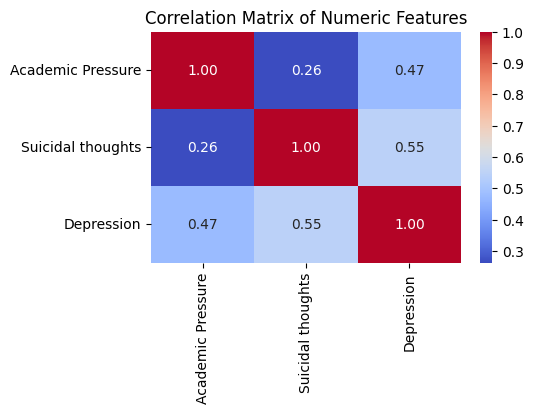

In [25]:
numeric_cols = ['Academic Pressure','Suicidal thoughts','Depression']
corr_matrix = data_df[numeric_cols].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


**The correlation between academic pressure and depression is moderately positive (r = 0.47), indicating that students who experience higher levels of academic pressure are more likely to report higher levels of depression. This result is both statistically relevant and conceptually expected, highlighting the mental health impact of academic stress**.

**Depression and Suicidal Thoughts**

**→ With a correlation of 0.55, this relationship is stronger than the one with academic pressure. This is a critical finding, implying that as depression increases, suicidal thoughts are more likely. This highlights a mental health risk that requires attention.**

 **Academic Pressure and Suicidal Thoughts**

**→ A relatively weak correlation (0.26) indicates only a slight tendency for academic pressure to relate to suicidal ideation. While the relationship is not strong, it should not be ignored, especially in high-stress academic environments.**



2.2 Are students with high study hours more likely to feel burnout or dissatisfied?

<Axes: xlabel='Depression', ylabel='Work/Study Hours'>

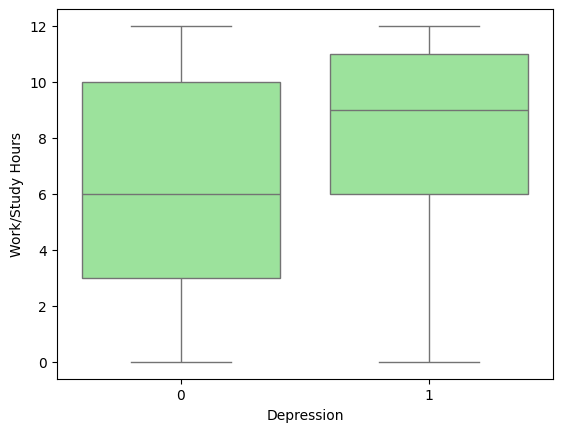

In [26]:
sns.boxplot(x='Depression', y='Work/Study Hours',color='lightgreen', data=data_df)


**The boxplot shows that students with depression (Depression = 1) tend to have higher median work/study hours (~8 hours) compared to those without depression (Depression = 0, ~6 hours).**
**This suggests a positive relationship between work/study time and depression levels, which may indicate that higher workload is associated with increased psychological stress.**

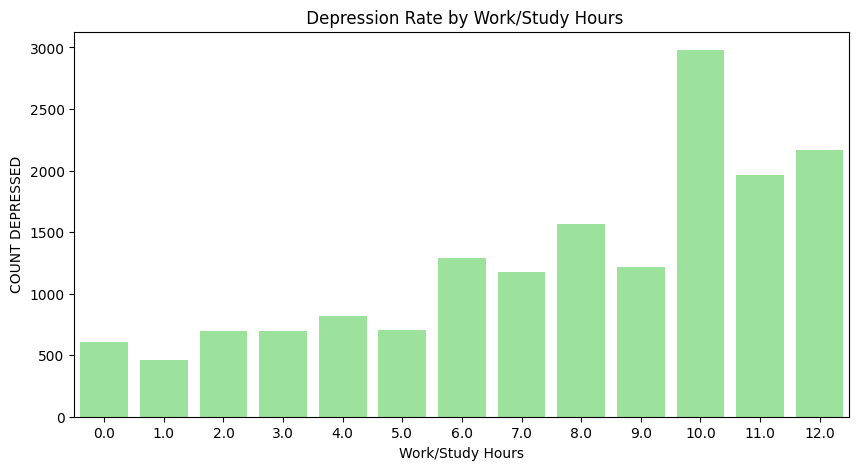

In [27]:
plt.figure(figsize=(10,5))
depressed_df = data_df[data_df['Depression'] == 1]
sns.countplot(x='Work/Study Hours',color='lightgreen', data=depressed_df)
plt.title(" Depression Rate by Work/Study Hours")
plt.ylabel("COUNT DEPRESSED")
plt.xlabel("Work/Study Hours")
plt.show()


**There is a noticeable upward trend: as the number of work/study hours increases, the count of depressed students also increases.
- The highest number of depressed students is found among those working/studying 10 to 12 hours per day.**


**2.3 Does academic pressure significantly affect mental health ?**

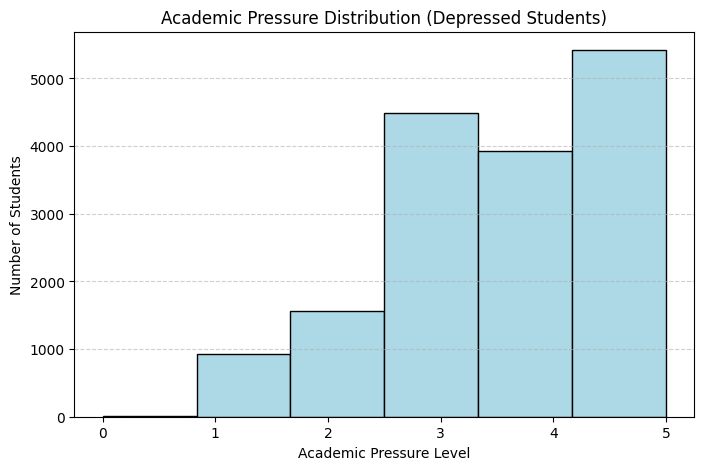

In [28]:
plt.figure(figsize=(8,5))
plt.hist(depressed_df['Academic Pressure'], bins=6, color='lightblue', edgecolor='black')
plt.title("Academic Pressure Distribution (Depressed Students)")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Number of Students")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**As academic pressure increases, students are exposed to depression more**

2.4 Does financial stress significantly affect mental health or academic performance?

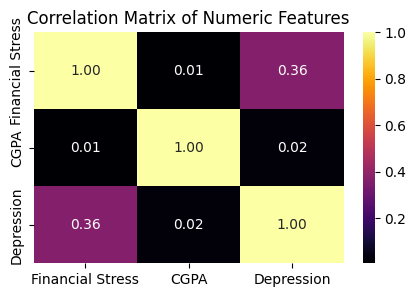

In [29]:
data_df['Financial Stress'] = pd.to_numeric(data_df['Financial Stress'], errors='coerce')
numeric_cols = ['Financial Stress','CGPA','Depression']
corr_matrix = data_df[numeric_cols].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


**Financial stress affects mental health but not academic performance; the relation is weak.**

C:\Users\DELL\AppData\Local\Temp\ipykernel_5316\3128303178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Depression', y='Financial Stress', data=data_df, palette='pastel')


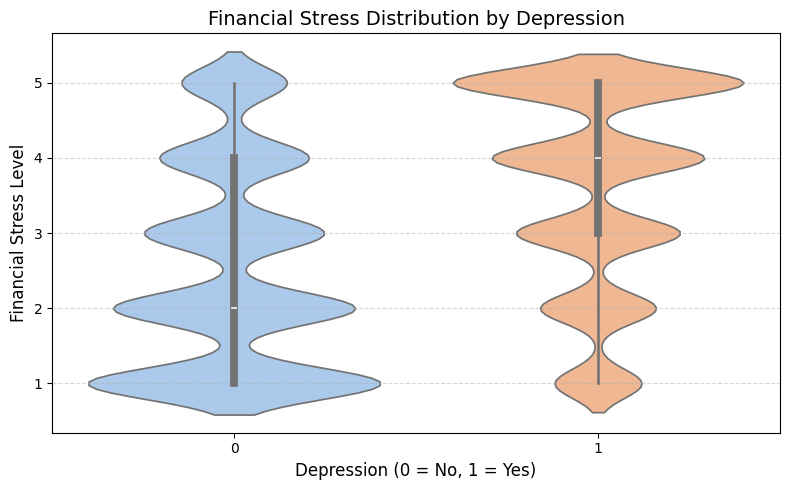

In [30]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Depression', y='Financial Stress', data=data_df, palette='pastel')
plt.title("Financial Stress Distribution by Depression", fontsize=14)
plt.xlabel("Depression (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Financial Stress Level", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**As FINANCIAL STRESS LEVEL increases, students are exposed to depression more**

2.5 Do people with low sleeping time report more depression?


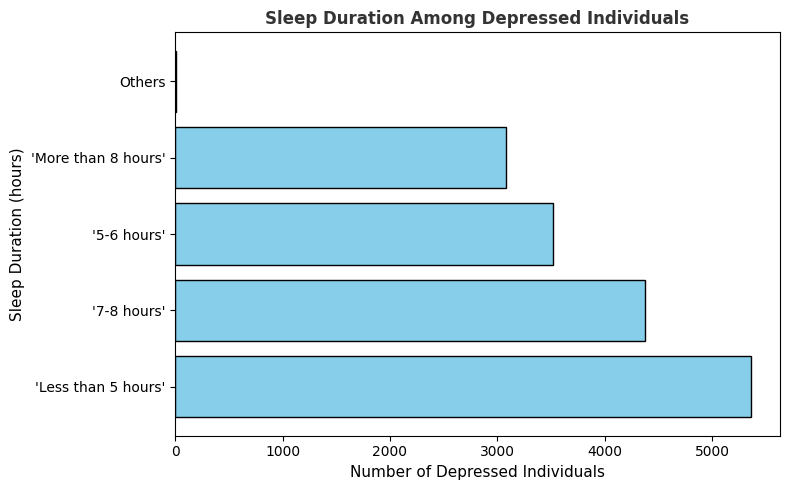

In [31]:
plt.figure(figsize=(8, 5))

sleep_counts = data_df[data_df['Depression'] == 1]['Sleep Duration'].value_counts()
colors = ['skyblue'] * len(sleep_counts)
plt.barh(sleep_counts.index.astype(str), sleep_counts.values, color=colors, edgecolor='black')

plt.title("Sleep Duration Among Depressed Individuals", fontsize=12, fontweight='bold', color='#333')
plt.xlabel("Number of Depressed Individuals", fontsize=11)
plt.ylabel("Sleep Duration (hours)", fontsize=11)

plt.tight_layout()
plt.show()






**people who sleep less than 5 hours more expose to depression**

2.6 Do people with poor dietary habits report more depression?


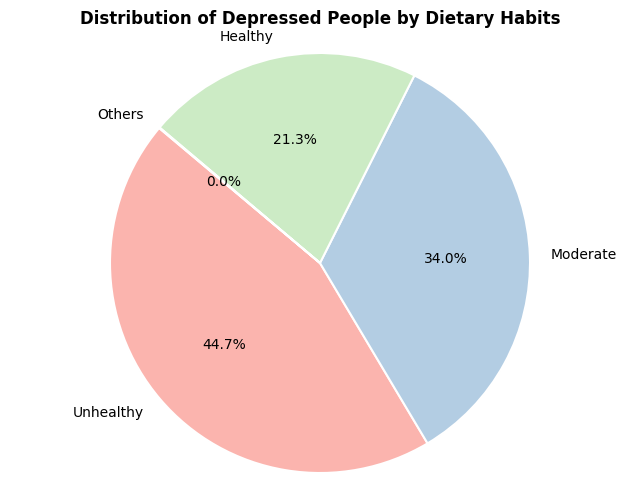

In [32]:
diet_counts = depressed_df['Dietary Habits'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(diet_counts, 
        labels=diet_counts.index,
        autopct='%1.1f%%', 
        startangle=140,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        colors=plt.cm.Pastel1.colors)

plt.title("Distribution of Depressed People by Dietary Habits",fontweight='bold')
plt.axis('equal')
plt.show()

**Unhealthy people suffer more from depression.**

2.7 Does Family History of Mental Illness report depression ?


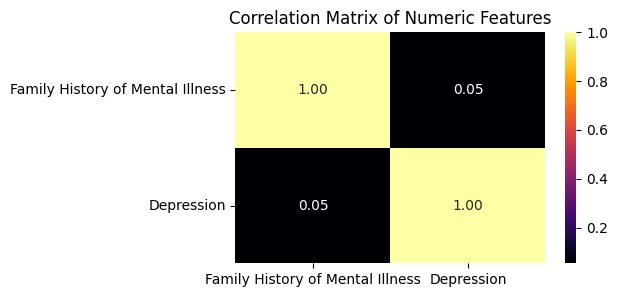

In [33]:
data_df['Financial Stress'] = pd.to_numeric(data_df['Financial Stress'], errors='coerce')
numeric_cols = ['Family History of Mental Illness','Depression']
corr_matrix = data_df[numeric_cols].corr()
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

There is no relation between family history of mental illness and depression.

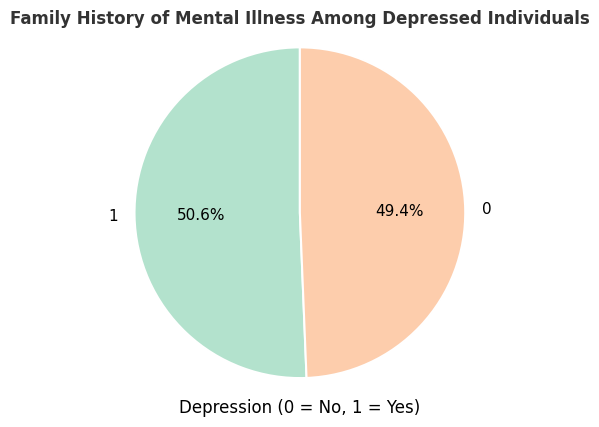

In [35]:
depressed_df = data_df[data_df['Depression'] == 1]
family_history_counts = depressed_df['Family History of Mental Illness'].value_counts()

colors = plt.cm.Pastel2.colors[:len(family_history_counts)]
plt.figure(figsize=(5, 5))
plt.pie(
    family_history_counts,
    labels=[f"{label}" for label in family_history_counts.index],
    autopct='%.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 11})

plt.title("Family History of Mental Illness Among Depressed Individuals", fontsize=12, fontweight='bold', color='#333')
plt.axis('equal')
plt.xlabel("Depression (0 = No, 1 = Yes)", fontsize=12)
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()


"The results show that the presence and absence of a family history of mental illness among depressed individuals are nearly equal, with a very small difference of just 1%. 

